# Linear Regression

Simple linear regression or single variable regression

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

# importing files from google in colab
1. from google.colab import files
2. upload=files.upload()

In [4]:
# reading data
data=pd.read_csv("headbrain.csv")
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# colecting x and y 
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

in order to find the values of m and c, you first need to calculate the mean of x and y

In [6]:
# mean x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [7]:
# Total number of values
n=len(X)

In [8]:
# using the formula to calculaet m and c
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
m=number/denom
c=mean_y-(m*mean_x)

In [9]:
# print coefficients
print(m,c)

0.26342933948939945 325.57342104944223


In [10]:
# calculate root mean squares error
rmse=0
for i in range(n):
    y_pred=c+m*X[i]
    rmse+=(Y[i]-y_pred)**2
rmse=np.sqrt(rmse/n)
print("Root Mean Square Error :",rmse)

Root Mean Square Error : 72.1206213783709


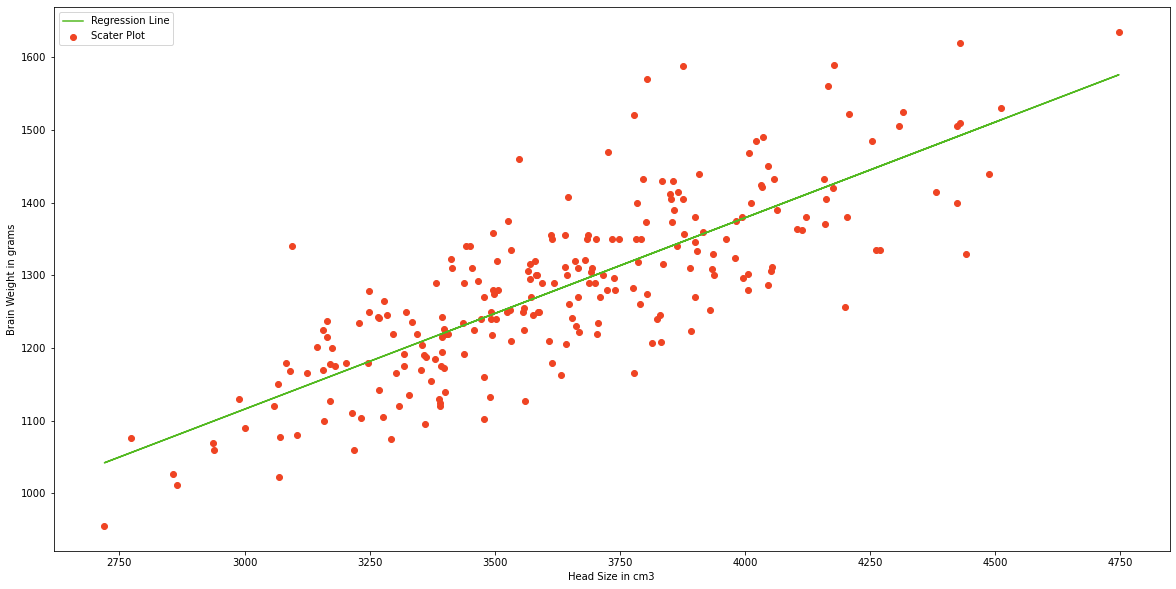

In [11]:
# plot scatter plot
y=c+m*X
plt.plot(X,y,color='#52b920',label='Regression Line')
plt.scatter(X,Y,color='#ef4423',label='Scater Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# simple linear regression

In [12]:
# import basic libraries
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [13]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [14]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [15]:
# with one variable
X=train.loc[:,['Item_MRP']]
# splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv =train_test_split(X,train.Item_Outlet_Sales)
# training the model
lreg.fit(x_train,y_train)
pred=lreg.predict(x_cv)
# calculating mse
mse=np.mean((pred - y_cv)**2)
mse

1911923.126675344

In [16]:
# two variables
X=train.loc[:,['Outlet_Establishment_Year','Item_MRP']]
# splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv =train_test_split(X,train.Item_Outlet_Sales)
lreg.fit(x_train,y_train) # training the model
pred=lreg.predict(x_cv) # Predicting on cv
mse=np.mean((pred - y_cv)**2) # calculating mse
mse

1956373.3325514556

In [17]:
# Calculating Coefficients
coeff=DataFrame(x_train.columns)
coeff['Coefficient Estimate']=Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-10.443035
1,Item_MRP,15.872961


y = mx+c consider 1 feature m is coefficient c is constant y=m1 X 1+m2 x 2+c m1,m2 are coefficients, c is constant positive m negative m 

In [18]:
lreg.score(x_cv,y_cv)

0.30141789445060563

In [19]:
# calculating R square measure
train['Item_Weight'].fillna((train['Item_Weight'].mean()),inplace=True)
train['Item_Visibility']=train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Size'].fillna('small',inplace=True)

In [20]:
X=train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
x_train, x_cv, y_train, y_cv =train_test_split(X,train.Item_Outlet_Sales)
lreg.fit(x_train,y_train)
pred=lreg.predict(x_cv)
mse=np.mean((pred - y_cv)**2)
mse

2012853.9321608231

In [21]:
# creating dummy variables to convert categorical into numerical values
mylist=list(train.select_dtypes(include=['object']).columns)
dummies=pd.get_dummies(train[mylist],prefix=mylist)
train.drop(mylist,axis=1,inplace=True)
X = pd.concat([train,dummies],axis=1)
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.200,0.066132,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930,0.066132,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [22]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
x=train.drop('Item_Outlet_Sales',1)
x_train, x_cv, y_train, y_cv =train_test_split(X,train.Item_Outlet_Sales)
lreg.fit(x_train,y_train)
pred=lreg.predict(x_cv)
mse=np.mean((pred - y_cv)**2)
mse

1.0716621374841866e-11

In [23]:
# redge Regression
from sklearn.linear_model import Ridge
x=train.drop('Item_Outlet_Sales',1)
x_train, x_cv, y_train, y_cv =train_test_split(X,train.Item_Outlet_Sales)
ridgeReg=Ridge(alpha=0.01,normalize=True)
ridgeReg.fit(x_train,y_train)
pred_cv=ridgeReg.predict(x_cv)
mse=np.mean((pred_cv - y_cv)**2)
mse

1426.7292901016215

In [24]:
# lasspreg Regression
from sklearn.linear_model import Lasso
x=train.drop('Item_Outlet_Sales',1)
x_train, x_cv, y_train, y_cv =train_test_split(X,train.Item_Outlet_Sales)
lassoReg=Lasso(alpha=0.01,normalize=True)
lassoReg.fit(x_train,y_train)
pred_cv=lassoReg.predict(x_cv)
mse=np.mean((pred_cv - y_cv)**2)
mse

0.6115494018741225